In [17]:
import pandas as pd
df = pd.read_csv("./Dataset.csv")

In [18]:
df['duration'].describe()

count    45718.000000
mean         0.365488
std          0.184568
min          0.000001
25%          0.401388
50%          0.434423
75%          0.497859
max          0.500000
Name: duration, dtype: float64

In [19]:
print(df.dtypes.to_string())

sAddress            object
rAddress            object
sMACs               object
rMACs               object
sIPs                object
rIPs                object
protocol            object
startDate           object
endDate             object
start              float64
end                float64
startOffset        float64
endOffset          float64
duration           float64
sPackets             int64
rPackets             int64
sBytesSum            int64
rBytesSum            int64
sBytesMax          float64
rBytesMax          float64
sBytesMin          float64
rBytesMin          float64
sBytesAvg          float64
rBytesAvg          float64
sLoad              float64
rLoad              float64
sPayloadSum          int64
rPayloadSum          int64
sPayloadMax        float64
rPayloadMax        float64
sPayloadMin        float64
rPayloadMin        float64
sPayloadAvg        float64
rPayloadAvg        float64
sInterPacketAvg    float64
rInterPacketAvg    float64
sttl               float64
r

In [20]:
df = df.drop(columns = ['start', 'end', 'startOffset', 'endOffset', 'IT_B_Label', 'NST_B_Label'])

In [21]:
df = df.tail(df.shape[0] // 2)

In [22]:
df_num = df.select_dtypes('number').dropna()

In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler((-1, 1)).set_output(transform = 'pandas')
df_num_norm = min_max.fit_transform(df_num)

In [24]:
df_num_norm.head()

,duration,sPackets,rPackets,sBytesSum,rBytesSum,sBytesMax,rBytesMax,sBytesMin,rBytesMin,sBytesAvg,...,sWinTCP,rWinTCP,sFragmentRate,rFragmentRate,sAckDelayMax,rAckDelayMax,sAckDelayMin,rAckDelayMin,sAckDelayAvg,rAckDelayAvg
22859,0.968824,-0.999720,-0.998601,-0.999447,-0.998272,1.0,0.60,1.00,0.0,1.000000,...,-0.973361,-0.999289,-1.0,-1.0,-0.370968,-0.244,-1.000000,-1.000000,-0.556058,-0.638853
22860,0.996583,-0.998322,-0.998322,-0.997202,-0.997566,1.0,0.68,0.92,1.0,0.959998,...,-0.973547,-0.999007,-1.0,-1.0,-0.189516,-0.380,-1.000000,-1.000000,-0.613223,-0.655840
22861,0.610443,-0.999441,-0.999441,-0.998993,-0.999148,1.0,0.60,1.00,1.0,1.000000,...,-0.973361,-0.999289,-1.0,-1.0,-0.362903,-0.532,-1.000000,-1.000000,-0.592779,-0.797706
22862,0.991426,-0.998601,-0.998322,-0.997650,-0.997566,1.0,0.68,0.92,1.0,0.965679,...,-0.973520,-0.999007,-1.0,-1.0,-0.407258,-0.388,-1.000000,-1.000000,-0.662725,-0.599402
22863,0.789117,-0.999441,-0.999441,-0.998993,-0.999148,1.0,0.60,1.00,1.0,1.000000,...,-0.973361,-0.999289,-1.0,-1.0,-0.387097,-0.408,-0.994302,-0.994845,-0.571338,-0.743898


In [25]:
label = df.dropna().reset_index()['IT_M_Label']

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
comp = pd.DataFrame(pca.fit_transform(df_num_norm))

<AxesSubplot: xlabel='0', ylabel='1'>

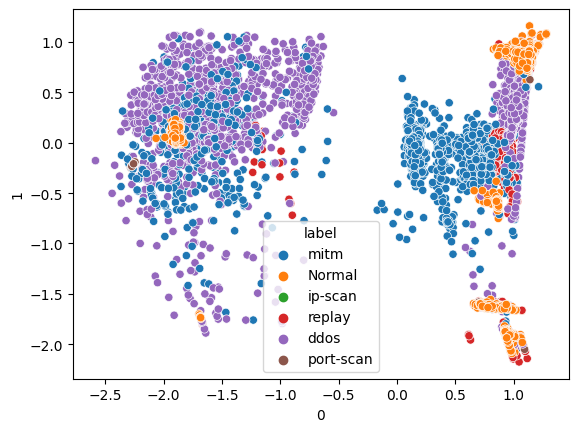

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
comp['label'] = label
sns.scatterplot(comp, x = 0, y = 1, hue = 'label')

In [28]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 250, verbose = 1, n_jobs = 8)
comp = pd.DataFrame(tsne.fit_transform(df_num_norm))

[t-SNE] Computing 751 nearest neighbors...
[t-SNE] Indexed 20014 samples in 0.004s...


KeyboardInterrupt: 

<AxesSubplot: xlabel='0', ylabel='1'>

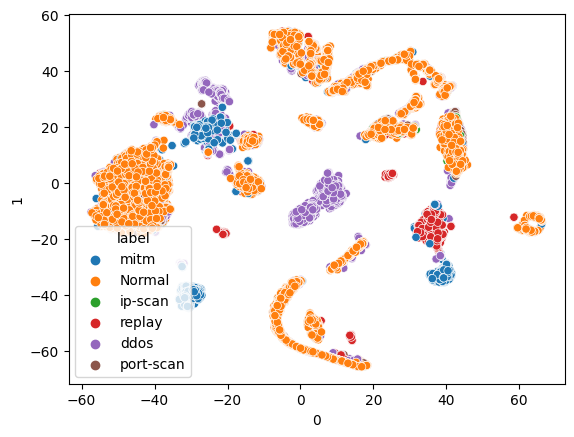

In [ ]:
comp['label'] = label
sns.scatterplot(comp, x = 0, y = 1, hue = 'label')